In [1]:
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import cv2

In [2]:
WINDOW_SIZE = 5
IMG_PATH_HAPPY = "./samples/happy"
IMG_PATH_SAD = "./samples/sad"

- We are extracting the frequencies in the coordinates (0, a)  
 (a, 0)    (a, a)      (a, -a) -> in our case a is always the +ve neighbor frequecies of the origin -> a = 1

In [3]:
def apply_LPQ(frame: np.ndarray, window_size: int) -> list: 
    # 1- get the window slices
    if(not (window_size % 2)):
        print("Error Window Size can't be Even")
        exit(1)

    a = window_size // 2    # radius of the window
    LPQ_hist = []
    # For all Pixels
    for row in range(a,frame.shape[0]-a):
        for col in range(a, frame.shape[1]-a):
            # 1- get the Window centered at the pixel
            window = frame[row-a:row+a+1, col-a:col+a+1]

            # 2- Find the STFT of this window
            img_fft = np.fft.fft2(window)
            img_fft = np.fft.fftshift(img_fft)
            
            # 3- Extract the 4 Frequencies of Interest
            freqs = img_fft[a-1:a+2, a:a+2] 
            f1 = img_fft[a-1,a]
            f2 = img_fft[a,0]
            f3 = img_fft[a,a-1]
            f4 = img_fft[a-2,a-1]

            # 4- Build the V Vector -> Concatination of Frequencies
            V = [f1, f2, f3, f4]

            # 5- Build the W Vector concatination of imaginary and real parts
            W = np.concatenate((np.imag(V), np.real(V))) 

            # 6- get the decimal Representatoin of the binary mapping
            b = (W > 0).astype('uint8')
            b = int(("".join(map(str, b))), 2)
            LPQ_hist.append(b)

    return LPQ_hist

### Testing LPQ 
HAPPY ALL FACE ANALYSIS

In [4]:
# Putting it all together
def draw_hists(dir, fn, *args):
    files = os.listdir(dir)
    num_images = len(files)
    c = 3
    r = num_images // 3 
    r += num_images % 3
    fig = plt.figure(1, figsize=(15,10))
    idx = 1
    for f in files:
        img = cv2.imread(cv2.samples.findFile(os.path.join(dir, f)), cv2.IMREAD_GRAYSCALE)
        # Extract Lips position ??? -> Not Accurate but efficient in testing
        hist = fn(img, *args)
        arr = np.array(hist)
        h, x = np.histogram(arr, bins=256)
        ax = fig.add_subplot(r,c,idx)
        idx += 1
        ax.hist(h,bins=x)
        ax.title.set_text(f);

#### Histograms for LPQ of Full face processing -> HAPPY

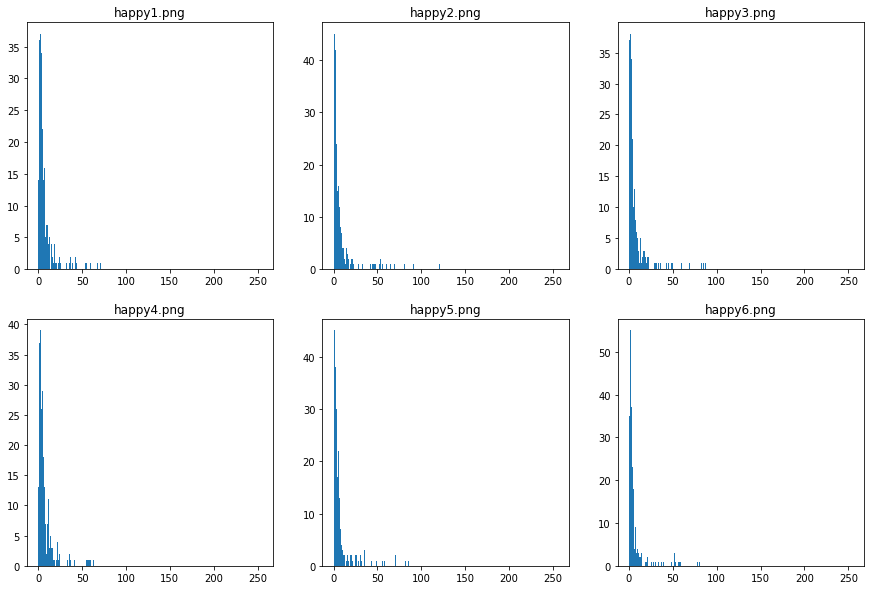

In [5]:
draw_hists(IMG_PATH_HAPPY, apply_LPQ, 5)

#### Histograms for LPQ of Full face processing -> SAD

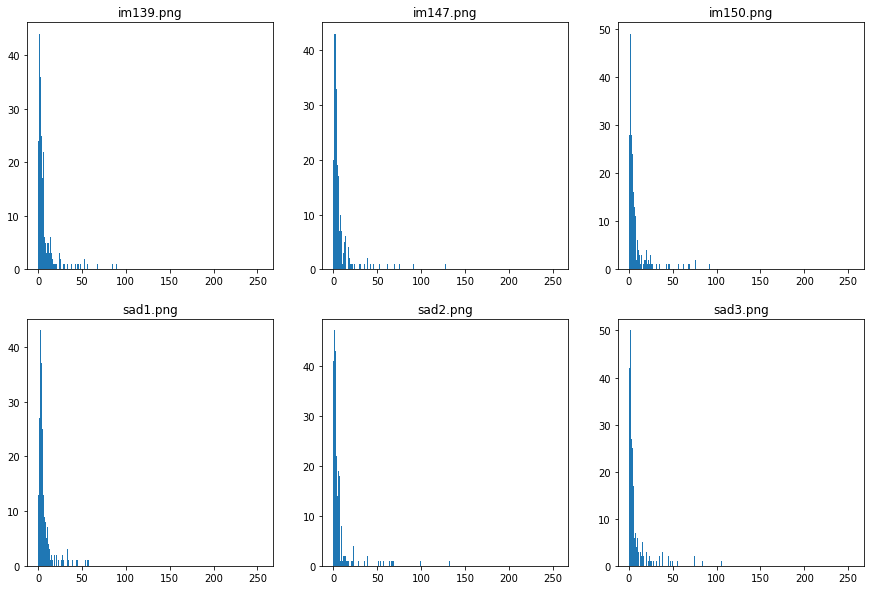

In [6]:
draw_hists(IMG_PATH_SAD, apply_LPQ, 5)

#### Lips Processing

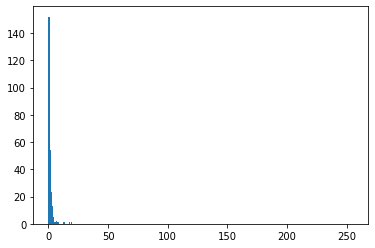

In [7]:
img = cv2.imread(cv2.samples.findFile("samples/happy/happy2.png"), cv2.IMREAD_GRAYSCALE)
# Extract Lips position 
row_min = img.shape[1] // 3 * 2 
col_min = img.shape[0] // 4 
col_max = img.shape[0] // 4 * 3 
img = img[row_min:, col_min:col_max+1]
hist = apply_LPQ(img, WINDOW_SIZE)
arr = np.array(hist)
h, x = np.histogram(arr, bins=256)
plt.hist(h,bins=x);

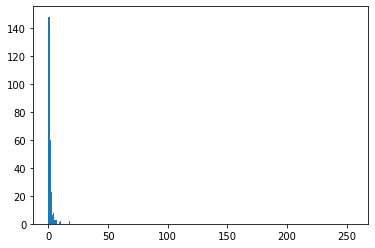

In [8]:
img = cv2.imread(cv2.samples.findFile("samples/sad/sad1.png"), cv2.IMREAD_GRAYSCALE)
# Extract Lips position 
row_min = img.shape[1] // 3 * 2 
col_min = img.shape[0] // 4 
col_max = img.shape[0] // 4 * 3 
img = img[row_min:, col_min:col_max+1]
hist = apply_LPQ(img, WINDOW_SIZE)
arr = np.array(hist)
h, x = np.histogram(arr, bins=256)
plt.hist(h,bins=x);